#### Importing Python Libraries

In [1]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

#### Loading the Pipeline and Data

In [2]:
lor = joblib.load('../Models/Logistic_Pipeline.pkl')
x_test = joblib.load('../Models/x_test.pkl')
y_test = joblib.load('../Models/y_test.pkl')

#### Predicting using the Pipeline

In [3]:
y_pred = lor.predict(x_test)

In [4]:
y_pred

array([1, 0, 0, ..., 0, 0, 1], shape=(1409,))

#### Actual and Predicted Values in DataFrame

In [5]:
comp = pd.DataFrame()
comp['Actual'] = y_test
comp['Predicted'] = y_pred
comp

,Actual,Predicted
185,1,1
2715,0,0
3825,0,0
1807,1,1
132,0,0
...,...,...
6366,0,0
315,0,0
2439,0,0
5002,0,0


#### Displaying number of Correct Predictions and Wrong Predictions

In [6]:
print(f"Number of Correct Predictions : {sum(comp['Actual'] == comp['Predicted'])}")
print(f"Number of Wrong Predictions : {sum(comp['Actual'] != comp['Predicted'])}")

Number of Correct Predictions : 1149
Number of Wrong Predictions : 260


#### Displaying the Accuracy Score and Classificaion Report of the Model

In [7]:
print(f'Accuracy Score : {accuracy_score(y_test,y_pred)}')

Accuracy Score : 0.815471965933286


In [8]:
print(f'Classification Report : \n{classification_report(y_test,y_pred)}')

Classification Report : 
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



#### Displaying the Confusion Matrix and its Heatmap

In [9]:
cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix : \n{cm}')

Confusion Matrix : 
[[933 103]
 [157 216]]


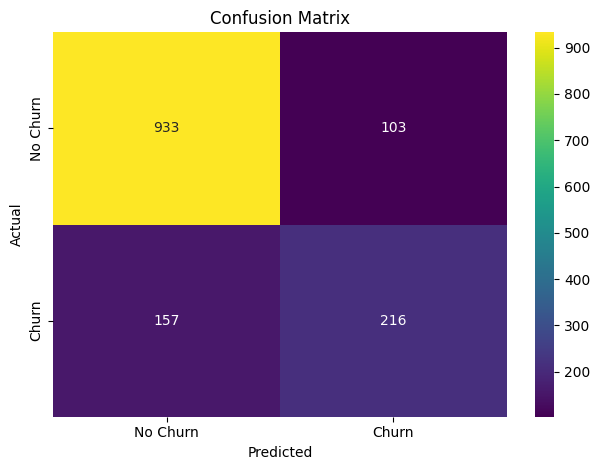

In [10]:
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', 
            xticklabels=['No Churn', 'Churn'], 
            yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [12]:
customer_data = pd.Series({
    "gender": "Female",
    "SeniorCitizen": 0,
    "Partner": "Yes",
    "Dependents": "No",
    "tenure": 1,
    "PhoneService": "No",
    "MultipleLines": "No phone service",
    "InternetService": "DSL",
    "OnlineSecurity": "No",
    "OnlineBackup": "Yes",
    "DeviceProtection": "No",
    "TechSupport": "No",
    "StreamingTV": "No",
    "StreamingMovies": "No",
    "Contract": "Month-to-month",
    "PaperlessBilling": "Yes",
    "PaymentMethod": "Electronic check",
    "MonthlyCharges": 29.85,
    "TotalCharges": 29.85
})
input_df = pd.DataFrame([customer_data])

In [14]:
prediction = lor.predict(input_df)
print("Predicted Churn:", prediction[0])

ValueError: could not convert string to float: 'Female'